![xkcd](https://imgs.xkcd.com/comics/machine_learning_2x.png)

_____

# Linear Algebra Homework

_____


### Problem 1: Interpolation versus Regression (5 points)

In your own words, describe the difference between regression and interpolation using the language of linear algebra. Does linear algebra provide an approach to extrapolation? Why or why not? 

**Regression and interpolation both deal with finding relationships in data but they differ in implementation because they have different goals. Imputation is typically used to find misisng values of data that are within the range of observed values (interpolation not extrapolation) so it is often tailored to the data and the model is potentially low in bias and high in variance, as in we are not as interested in the noise. Thus, interpolation models can be over parameterized. If you are doing polynomial interpolation as an example you can construct a square design matrix where the number of samples equals the number of parameters to simplify the linear algebra like so where c is a vector of coefficients that will allow interpolation.**

$$
P(x) = c_0 + c_1x + c_2x^2 + \cdots + c_{n-1}x^{n-1}
$$

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{n-1}
\end{bmatrix}
$$

$$
X \mathbf{c} = \mathbf{y}
$$


$$
\mathbf{c} = X^{-1} \mathbf{y}
$$

**In contrast, regression is about finding the approximate best fit based on minimizing least squares. Regression is more appropriate for extrapolation of values outside of the observed range because it considers error resulting in a model with generally less variance and higher bias.**
$$
y = \mathbf{X}\mathbf{c} + \epsilon
$$

**To find our coeffecients in regression we minimiize the sum of squared residuals which ends up with an eqn like this**

$$
\|\mathbf{r}\|^2 = \|\mathbf{y} - \mathbf{X}\mathbf{c}\|^2
$$


$$
\mathbf{c} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

*I used Thetawise ai on 11/3 at  5 PM to work work through some specific examples in Latex above and sometimes in questions 2, 3 and part of 6. I generally find Thetawise to be the best mathmatical focused LLM that breaks down concepts. I could not find the version of the Thetawise model in use on the website or on google so perhaps it is hidden?* 

____

### Problem 2: Polynomial Regression (10 points)

We have learned that linear regression refers to fitting data to a model in which the weights appear linearly. But, the model itself need not use linear functions. The Gaussian RBFs we used were an example of that. Another very common choice is that of a polynomial. Let's code two cases in which the number of weights is and is not the same as the number of data points.

We wish to model our data with a polynomial. The data you are given is:
$$x = [-2, -0.5, 0, 1] ,$$
$$y = [0, 0.9375, 1, 3] .$$
Because you have four data points, you are tempted to use a model with four parameters, such as:
$$y = w_0 + w_1x + w_2x^2 + w_3x^3 .$$
But, you are also worried that the data may be noisy so you **also** want to fit it to only three weights. You decide that the $x^3$ term could cause large excursions that might follow the noise, so your second model is:
$$y = w_0 + w_1x + w_2x^2.$$

Using only libraries from `linalg`, fit the data to both models. Plot the data and the two resulting models.

As we have seen, the coding for this is trivial - the hard part is setting up the vectors and matrices. Slow down and be sure you understand what you are doing: this will help you set up the problem so that it is very easy. I'll give you a hint:
$$\underbrace{\begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix}}_{4\times 1} = \underbrace{\begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix}}_{4\times 1} =\underbrace{\begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\\vdots  \end{bmatrix}}_{4\times 4}\underbrace{\begin{bmatrix} w_0\\w_1\\w_2\\w_3\end{bmatrix}}_{4\times 1}.$$
It is crucial that you know where this came from!! Explain in a markdown cell where I got these numbers from.

You then use Python to get the weight vector ${\bf w}$, which allows you to plot the resulting polynomial. In one case you will need to use the pseudoinverse, [the `pinv` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html), or in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv), because you have more data points than weights.

If you write your code in a general way, it is easy to implement the third model:
$$y = w_0 + w_1x.$$
Do that next.

In the world of machine learning, we would need to figure out which of these three models is the "best", a process called "_model selection_". We won't worry about it now, but I wanted you to at least be aware of the idea. A second idea I'll introduce here is "_regularization_", since it is connected. Regularization is penalizing weights that cause large excursions; here, we are doing this by hand by dropping the higher-order terms (e.g., setting $w_3=0$), thereby prohibiting predictions with large excursions.  There are very powerful techniques for automating this. There is a lot to learn from this problem other than just setting up regression problems and inverting a matrix! 🤓 In a markdown cell, comment on which model you think is best based on your plot(s) and explain your reasons. (If you take a machine learning course, you will learn powerful mathematical methods to make this judgement.)


0.8650000000000007 0.8650000000000007
1.5900000000000003 1.5899999999999999
0.5750000000000005 0.5749999999999997


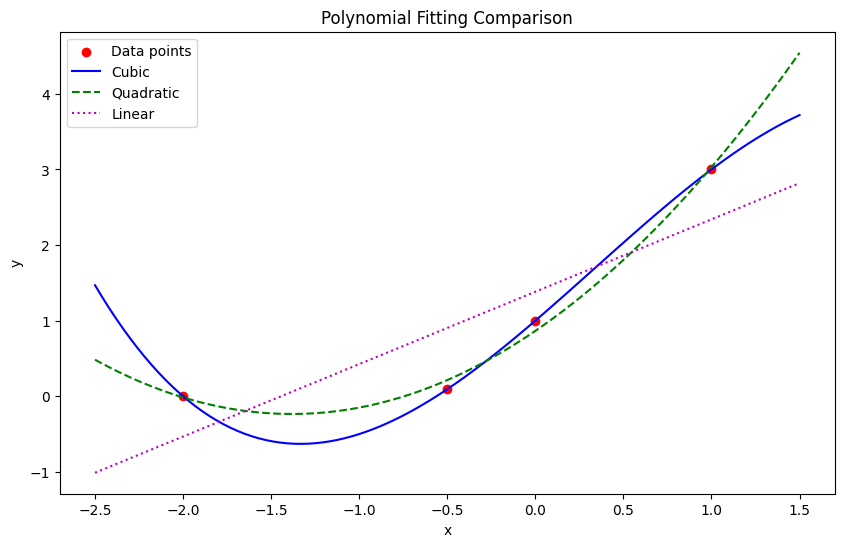

Cubic coefficients (w0, w1, w2, w3): [ 1.    2.    0.25 -0.25]
Quadratic coefficients (w0, w1, w2): [0.865 1.59  0.575]
Linear coefficients (w0, w1): [1.3825 0.9575]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([-2, -0.5, 0, 1])
y = np.array([0, 0.09375, 1, 3])

# Create design matrices
X_cubic = np.vstack([np.ones_like(x), x, x**2, x**3]).T
X_quadratic = np.vstack([np.ones_like(x), x, x**2]).T
X_linear = np.vstack([np.ones_like(x), x]).T

# Solve for weights using matrix inverse
# For cubic: w = X^(-1)y because X is square
w_cubic = np.linalg.inv(X_cubic) @ y

# For quadratic: w = (X^T X)^(-1) X^T y 
# because (X^T X)^(-1) is square and full column rank I don't think we need to use pinv or maybe I am doing something wrong?? 
w_quadratic_p = np.linalg.pinv(X_quadratic.T @ X_quadratic) @ X_quadratic.T @ y
w_quadratic = np.linalg.inv(X_quadratic.T @ X_quadratic) @ X_quadratic.T @ y

# check equivalence between pinv and inv
# they are similar to about 15 digits which seems minor
[print(w_quadratic_p[i], w_quadratic[i]) for i in range(len(w_quadratic))]

# For linear: w = (X^T X)^(-1) X^T y
w_linear = np.linalg.pinv(X_linear.T @ X_linear) @ X_linear.T @ y

# Create points for lines
x_smooth = np.linspace(min(x)-0.5, max(x)+0.5, 100)
X_smooth_cubic = np.vstack([np.ones_like(x_smooth), x_smooth, x_smooth**2, x_smooth**3]).T
X_smooth_quadratic = np.vstack([np.ones_like(x_smooth), x_smooth, x_smooth**2]).T
X_smooth_linear = np.vstack([np.ones_like(x_smooth), x_smooth]).T

# Calculate predicted values with matrix multiplication
y_cubic = X_smooth_cubic @ w_cubic
y_quadratic = X_smooth_quadratic @ w_quadratic
y_linear = X_smooth_linear @ w_linear

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_smooth, y_cubic, 'b-', label='Cubic')
plt.plot(x_smooth, y_quadratic, 'g--', label='Quadratic')
plt.plot(x_smooth, y_linear, 'm:', label='Linear')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting Comparison')
plt.legend()
plt.show()

print("Cubic coefficients (w0, w1, w2, w3):", w_cubic)
print("Quadratic coefficients (w0, w1, w2):", w_quadratic)
print("Linear coefficients (w0, w1):", w_linear)

$$\underbrace{\begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix}}_{4\times 1} = \underbrace{\begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix}}_{4\times 1} =\underbrace{\begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\\vdots  \end{bmatrix}}_{4\times 4}\underbrace{\begin{bmatrix} w_0\\w_1\\w_2\\w_3\end{bmatrix}}_{4\times 1}.$$

**The numbers of y vector are simply the provided y values. The X matrix has a 1 in the first col for the intercept, and then each proceeding col contains x raised to the corresponding polynomial e.g. so for the first row x = -2, x^1 = -2, x^2 = 4, x^3 = -8 (is that a typo in matrix?)**

**as far as which model is the "best". I think it depends on the context. Did we make our measurements with high precision and are we interested in values within the range of -2 < x < 1? In that case I would go with the cubic model. Otherwise I might go with the quadratic model as it appears to be a nice middle ground in capturing the true relationship without being overfit.**

____

### Problem 3: Inverting a Matrix By Hand (10 points)

I mentioned in class that we will mostly rely on Python libraries for performing linear algebra operations. Why not, isn't that why they were developed?!

However, it is also good practice to know how to do these by yourself for the simplest cases. This allows you to explore ideas without a computer and build your intuition for what the libraries are doing. We'll learn here how to invert a $2\times 2$ matrix by hand. Being able to do this by hand also gives you a test case to ensure you are using the Python libraries correctly.

Follow these steps:
1. Make a $2\times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$ using a NumPy array (you might want to try several choices); if you don't know about these already, NumPy has [some nice functionality for creating arrays](https://numpy.org/doc/stable/user/basics.creation.html), which can be matrices, of various types.
2. Find the [determinant](https://en.wikipedia.org/wiki/Determinant) of your matrix, using:
$$ \mathrm{det}(A) = ad - cb.$$
Do this by hand, not with a library.
3. Form the inverse $A^{-1}$ with
$$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{bmatrix} d & -b \\ -c & a\end{bmatrix}.$$
Show all of your steps using $\LaTeX$ in a markdown cell.
4. Now that you have $A^{-1}$, use the rules of matrix multiplication to find the product $A^{-1}A$. Show your steps.
5. Vary the matrix $A$ and comment on anything interesting you see. For example, what would $A$ look like if its determinant were $0$? For example, make a matrix for which $b=2a$ and $d = 2c$. What does this case correspond to?

____
$$
A = \begin{bmatrix} 5 & 15 \\ 2 & 4\end{bmatrix}
$$

$$
\mathrm{det}(A) = 5*4 - 2*15 = -10.
$$

$$
A^{-1} = \frac{1}{-10}\begin{bmatrix} 4 & -15 \\ -2 & 5\end{bmatrix} = \begin{bmatrix} -0.4 & 1.5 \\ 0.2 & -0.5\end{bmatrix}
$$

$$
A^{-1}*A = \begin{bmatrix} -0.4 & 1.5 \\ 0.2 & -0.5\end{bmatrix} * \begin{bmatrix} 5 & 15 \\ 2 & 4\end{bmatrix}
$$

$$
= 
\begin{bmatrix}
(-0.4 \times 5 + 1.5 \times 2) & (-0.4 \times 15 + 1.5 \times 4) \\
(0.2 \times 5 + -0.5 \times 2) & (0.2 \times 15 + -0.5 \times 4)
\end{bmatrix}
$$

$$
= \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} = I
$$

**When the determinant is 0, we can't divide by 0 so that blows up the inversion and you would say the matrix is singular. Similarly when b = 2a and d = 2c then the columns are linearly dependednt because the 2nd column can be constructed by multiplying by 2. In this case the matrix is singular as well because it cannot be inverted.**

In [2]:
A = np.array([[5, 15],
              [2, 4]])

A_inv = np.linalg.inv(A)
# identity matrix
print(A_inv @ A)

[[1. 0.]
 [0. 1.]]


In [3]:
# vary A
A = np.array([[3, 15],
              [1, 4]])

A_inv = np.linalg.inv(A)
# identity matrix
print(A_inv @ A)

[[1. 0.]
 [0. 1.]]


____

### Problem 4: Inner and Outer Product (5 points)

Given the two vectors:
$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix},$$
compute the two outer products
$$v_1 v_2^T,$$
and
$$v_2 v_1^T.$$
Do this _both_ by hand, and show your work using $\LaTeX$, and using a NumPy or SciPy library. Next, do the same for the two possible **inner** products. 


Does the order of the vectors matter for the outer product? That is, what is the commutivity relation for these operations? Show and explain all of the details.

**Outer Products**

$$
v_1 v_2^T = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} = \begin{bmatrix} 1 \cdot 1 & 1 \cdot 1 & 1 \cdot 1 \\ 2 \cdot 1 & 2 \cdot 1 & 2 \cdot 1 \\ 3 \cdot 1 & 3 \cdot 1 & 3 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{bmatrix}
$$

$$
v_2 v_1^T = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} = \begin{bmatrix} 1 \cdot 1 & 1 \cdot 2 & 1 \cdot 3 \\ 1 \cdot 1 & 1 \cdot 2 & 1 \cdot 3 \\ 1 \cdot 1 & 1 \cdot 2 & 1 \cdot 3 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}
$$

**No the outer products of v1 and v2 are commutative. Even though they both result in a 3x3 matrix the values change because of the rules of matrix multiplcation**

**Inner Products**
$$
v_1^T v_2 = 1 \cdot 1 + 2 \cdot 1 + 3 \cdot 1 = 1 + 2 + 3 = 6
$$

$$
v_2^T v_1 = 1 \cdot 1 + 1 \cdot 2 + 1 \cdot 3 = 1 + 2 + 3 = 6
$$

____

### Problem 5: Randomized Experiments (10 points)

In data science, we often work with existing datasets. However, some of the most crucial decisions in both personal and professional contexts depend on data that must first be collected through carefully designed experiments. From medical trials testing new treatments to A/B tests in tech companies, the quality of our conclusions depends fundamentally on the quality of our experimental design.

Read Chapter 11 ("Randomized Experiments") from "Thinking Clearly with Data." As you read, consider:
- How does randomization address the problem of bias? What is the connection to missingness? 
- What makes an experiment truly "controlled"?
- Why might seemingly well-designed experiments still fail?

1. Provide a concise summary of the chapter's main points.
 - **Controlling for confounders is not a bullet-proof strategy but setting up treatment groups in such a way so that treated and untreated have the same expected outcome is the best way to make casual inference about some relationship. This is the basis of randomization. Still prblems can arise such as how do we establish both groups have expected outcomes, and even limitations about resources available. These obstacles can be naviagted by evaluating the experiment for systemic issues, controlling for factors as best you can in the analysis, or by performing Instrumental Variable analysis.**
2. Identify and explain what you consider to be the single most important conclusion from this chapter. Why did this particular point resonate with you?
 - **The most important conclusion was the simple fact that if we design our experiment so that treated and untreated groups have the same expected outcome then we can make casual claims. That is to say if they have the same expected outcome and they DON't then it is probably because of the treatment. This resonated with me I think because of the simplicity and elegance of the logic.**
3. Give a real-world example where proper experimental design is crucial (this could be from medicine, technology, social science, etc.).
 - **I work in plant biology/plant breeding. A lot of the considerations made for experimental design in human studies are not needed for plants because no matter how poorly you treat a plant it never complains. That doesn't mean experimental design is not foundational. In a lot of ways plant breeding experiments allow more control of the pre-treatment factors. That is to say we can control factors about what kind of plants we study and where exactly they are studied. The environment is a large source of variation that we often try to control for with experimental design. Across a field their could be variation in elevation and soil chemistry that will affect plants so for this reason the field is often blocked out into regions based on physical proximity and all the treatments are randomized within individual blocks.**

4. Reflect on how this knowledge might influence your:
   - Future work as a data scientist
   - Personal decision-making (especially regarding medical or scientific claims)
   - Understanding of scientific literature and news

 - **I think reading this chapter reinforced what I have suspected for a while but what I am learning first-hand now as  PhD student. If you design the right experiment then the analysis and interpretation are almost trivial in comparison.**
 
Use an AI assistant (like Claude 3.5 Sonnet (New), ChatGPT 4o or o1, etc.) to help you organize and synthesize the chapter's key concepts. Give your own summary and then some suggested prompts:
- "Create a comparison table showing the differences between randomized experiments and observational studies"
- "Generate a decision tree using Mermaid for determining whether an experiment is properly randomized"
- "Organize my summary of the key threats to validity in experimental design and how to address them"

Include both your prompts and the AI's responses in your submission, along with your own analysis of how helpful (or not) the AI was in deepening your understanding.

**I used Claude 3.5 Sonnet at approximately 9:30 PM on 11/3, this is the conversation (I will paraphrase some longer parts by Claude):**

**Me:** Here is my summary about designing randomized experiments from a chapter I read, "Research designs allow methods that allow researchers to learn more about casuality. Randomized experiments are a part of research design. Estimate = Estimated + Bias + Noise, randomization takes care of bias assuming that it is done right but there can still be a lot of noise that will throw off the estimate. Experimental estimates or treatments means from randomized experiments can be treated with statistical methods to make inferences including standard erros, hypothesis testing. Several issues that can arise that make experimental design and analysis more complicated than simply assigning treatments based on random chance. There is the people element “noncompliance”. Non-compliance can be dealth with through instrumental variable analysis. That is a variable that affects treatment of interest, does not affect the outcome of interest except through the treatment, and is randomly assigned. Another possible obstacle is chance imbalance in pre-treatment randomization. Noise can arise from imbalanced pre-treatment variables, if there are serious systematic erros you may throw out data. You may proceed normally or you may try to control for imbalanced groups through including in regression (controlling). Or some combination or all 3 strategies.When the standard error of treatment is so large that results are inconclusive you would say the experiment lacks statistical power. Establishing an experiment is about establishing that in expectation, treatment and untreated groups will have the same outcome." 

Can you make a decision tree for how to deal with complications that can arise using Mermaid?

**Claude:** I'll create a decision tree showing how to handle various complications that can arise in randomized experiments... (some mermaid code) ... I've created a decision tree that outlines the major complications mentioned in your summary and how to address them. The tree is organized into three main branches:

Participant-Related Issues

Focuses on non-compliance and the potential use of instrumental variables


Data-Related Issues

Addresses pre-treatment imbalances with various severity levels
Shows different strategies including normal progression, regression control, or data removal


Results-Related Issues

Handles statistical power concerns
Suggests solutions when standard errors are too large



Would you like me to add any additional complications or decision points to the tree?

**Me:** How can I display that in jupyter notebook?

**Claude:** [Some instructions to to display that didn't end up working, not sure why and then suggests graphviz because it is more commonly pre-installed in jupyter notebook environment (not mine) and Graphviz tends to produce more professional-looking diagrams but also mentions that it's not interactive like mermaid.]

**Overall I thought the decision tree it came up with was actually pretty good considering that I just wrote down my notes about the chapter without a ton of mind towards organizating the ideas in a way that lends itself to a flowchart. It's pretty basic but I think it captures the spirit of the chapter pretty well. The instructions it gave to display the mermaid chart did not work for me but the graphviz code worked almost immediately after I installed the graphviz library. While the mermaid pip library it suggested straight up did not exist "pip install mermaid-magic"** 
 
Remember: The best data analysis cannot overcome poor experimental design. As future data scientists, understanding how to collect good data is just as important as knowing how to analyze it.

In [4]:

from graphviz import Digraph

In [5]:
# Create a new directed graph
dot = Digraph(comment='Experimental Complications Decision Tree')
dot.attr(rankdir='TB')  # Top to Bottom direction

# Add nodes
dot.attr('node', shape='box')
dot.node('A', 'Experimental Complication Detected')

dot.attr('node', shape='diamond')
dot.node('B', 'What type of issue?')

dot.attr('node', shape='box')
dot.node('C', 'Non-compliance')
dot.node('D', 'Pre-treatment Imbalance')
dot.node('E', 'Large Standard Error')

dot.attr('node', shape='diamond')
dot.node('F', 'Can you use IV analysis?')
dot.node('I', 'How severe is imbalance?')
dot.node('N', 'Lacks Statistical Power?')

dot.attr('node', shape='box')
dot.node('G', 'Apply Instrumental\nVariable Analysis')
dot.node('H', 'Document non-compliance')
dot.node('J', 'Proceed normally')
dot.node('K', 'Control via regression')
dot.node('L', 'Remove problematic data')
dot.node('M', 'Combine strategies')
dot.node('O', 'Consider:\n1. Increase sample size\n2. Reduce variance\n3. Adjust effect size')
dot.node('P', 'Proceed with analysis')

# Add edges
dot.edge('A', 'B')
dot.edge('B', 'C', 'Participant Related')
dot.edge('B', 'D', 'Data Related')
dot.edge('B', 'E', 'Results Related')

dot.edge('C', 'F')
dot.edge('F', 'G', 'Yes')
dot.edge('F', 'H', 'No')

dot.edge('D', 'I')
dot.edge('I', 'J', 'Minor')
dot.edge('I', 'K', 'Moderate')
dot.edge('I', 'L', 'Severe')
dot.edge('I', 'M', 'Multiple\nissues')

dot.edge('E', 'N')
dot.edge('N', 'O', 'Yes')
dot.edge('N', 'P', 'No')

# Display the graph
dot.render('experimental_complications', view=True, format='png')

'experimental_complications.png'

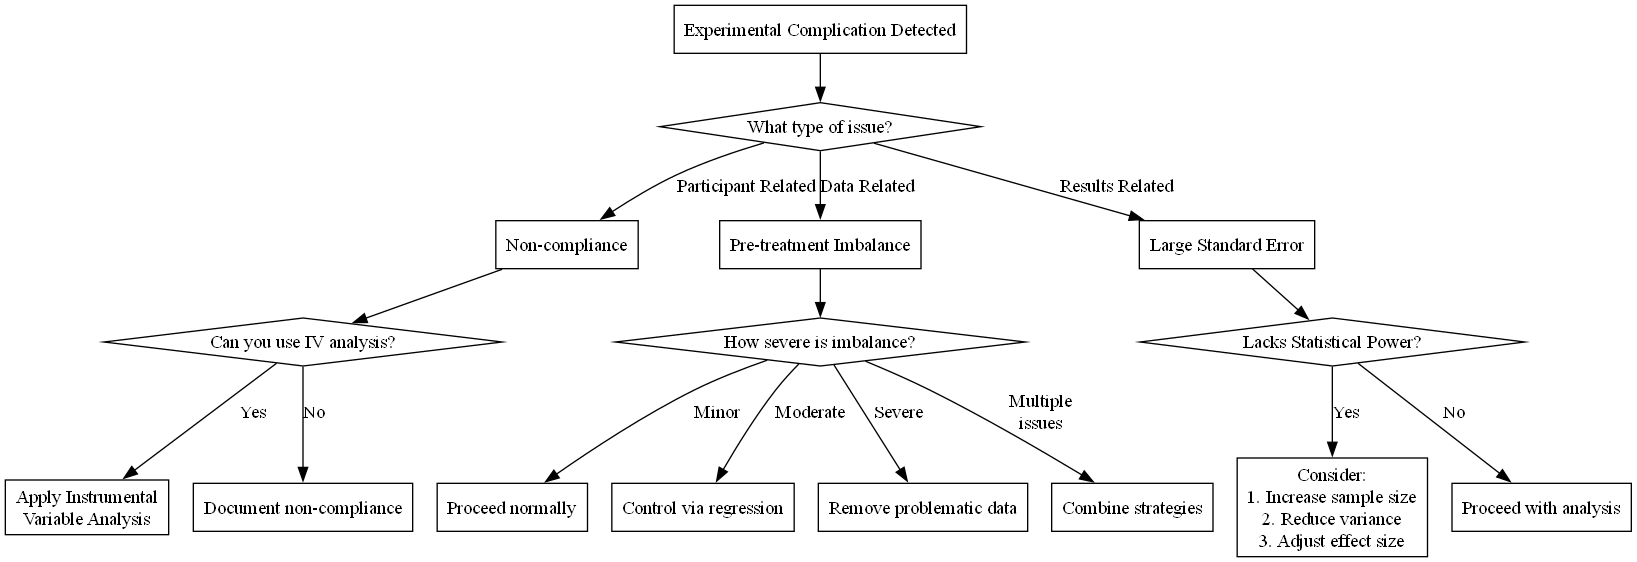

____

### Problem 6: Computational Linear Algebra (10 points)

First, run this code that generates some data for you.

In [4]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create these matrices:
A = np.random.randn(4, 3)  # 4x3 matrix from standard normal distribution
B = np.random.randn(3, 4)  # 3x4 matrix from standard normal distribution
C = np.random.randn(4, 4)  # 4x4 matrix from standard normal distribution
v = np.random.randn(3)     # vector of length 3
#

Before computing anything, write down the dimensions of $A$, $B$, $v$, $AB$, $BA$, $Av$, $vA$. Do all of these make sense? If any of these don't make sense, how can you "fix" them? 

**Dimensions**
 - A = 4rows x 3cols
 - B = 3 x 4
 - C = 4 x 4
 - v = 3, is a vector so I believe it can be either a column vector (3x1) or row vector (1x3) 


Now, only use [Python's Numpy](https://numpy.org/doc/stable/reference/routines.linalg.html). 

Using Numpy perform these operations:
1. use the @ operator to perform matrix multiplication in Python, comparing $A @ B$ and $B @ A$ and $A @ v$ and $v @ A$; explain your findings - did you get what you expected? any errors? 
    **I expected that $v @ A$ would blow up because the number of cols in v needs to be equal to the number of rows A. There are 4 rows in A and thus no way to arrange v to match A. Everything else appears to have ran well.** 
2. use Numpy to compute the transpose of $C$; do this twice - do you get $C$ back again? 
 **Yes**
3. compute the trace of $C$
 **Done**
4. copmute the inverse of $C$ if it has one; if it does, compute and print $CC^{-1}$
 **Done**
5. form the symmetric matrix $S = \frac{1}{2}\left( C + C^T\right)$; what is the transpose of $S$ and how is it related to $S$ itself? 

$$
S^T = \left( \frac{1}{2} \left( C + C^T \right) \right)^T = \frac{1}{2} \left( C + C^T \right)^T
$$
**We just showed that if you take the transpose twice you end up back where you started**
$$
\left( C + C^T \right)^T = C^T + \left( C^T \right)^T = C^T + C
$$
**So therefore $S = S^T$ which is a property of symmetric matrices** 
$$
S^T = \frac{1}{2} \left( C^T + C \right) = \frac{1}{2} \left( C + C^T \right) = S
$$

6. compute the eigenvalues of $S$ and $C$ - how do they differ, if they do? 

**Besides the values being different the main difference I notice is that C contains two imaginary eigen values while all of S are real which is another property of symmetric matrices**

In [5]:
#1 
AB = A @ B
BA = B @ A
Av = A @ v
vA = v @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [ ]:
# 2 transpose and back again
C_t = C.T
C_2 = C_t.T
C == C_2

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
# 3 Trace or sum along diagonals
C_trace = np.trace(C)

In [ ]:
# 4 C inverse
C_inv = np.linalg.inv(C)
print(C_inv)

[[-1.06921431 -0.48593431 -0.97917626  0.54031002]
 [ 0.17869094 -0.24687479 -0.36273004 -0.26764901]
 [-0.50323677  0.35587182  0.34215509 -0.26613004]
 [-0.48204927  0.45902805 -0.26349188  0.04660604]]


In [ ]:
# 5 Make symmetric matrix
S = 0.5 * (C + C.T)
S_t = S.T
print(S == S_t)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [ ]:
# 6 compute eigen values
s_eig, s_vec = np.linalg.eig(S)
c_eig, c_vec = np.linalg.eig(C)
print(s_eig)
print(c_eig)

[ 2.11623946 -1.35369176  0.04072203 -0.61994005]
[-0.80662467+0.j         -0.3807415 +1.67337999j -0.3807415 -1.67337999j
  1.75143734+0.j        ]
